**Project #2 – Computer Science Algorithms**

Background – Recursive algorithms, search algorithms, and sorting algorithms are often common
interview questions. Yes, even for data scientists! Implement either the recursive algorithm or search
algorithm prompt below.

*Recursion*

Recursion is a powerful tool and an important concept in computer science. A recursive function is one that
calls itself. A recursive function consists of two parts:

    1. The base case(s): the case(s) containing the solution to the simplest/smallest form of the problem. At this point, the solution can be stated non-recursively.
    
    2. The recursive case: the case in which the function calls itself on a simpler/smaller version of the problem.
    
If you’re confused, just remember that in order to understand recursion, you must first understand
recursion.

The mathematical concept of factorial (n! = the product of all positive integers less than or equal to n, e.g.
5! = 5*4*3*2*1 = 120) is an example of a problem that can be solved recursively. Below are example
functions that solve factorial iteratively and recursively, as well as one that compares the time it took for
your computer to solve n! using each method.

1. Walk through each algorithm (pen and paper) using n = 5 and make sure that you understand how each function works.

**Iterative Factorial - sequential for loop**

n = 5

factorial = 1

for i in range 5 to 1, step size -1

 i = 5, factorial x= n => 1 x 5 = 5, n -= 1 => 5 - 1 = 4

 i = 4, factorial x= n => 5 x 4 = 20, n -= 1 => 4 - 1 = 3

 i = 3, factorial x= n => 20 x 3 = 60, n -= 1 => 3 - 1 = 2

 i = 2, factorial x= n => 60 x 2 = 120, n -= 1 => 2 - 1 = 1

 i = 1, factorial x= n => 120 x 1 = 120, n -= 1 => 1 - 1 = 1

factorial = 120
 
**Recursive Factorial**

 n = 5

 if n<=1
    return 1 (base case)

 return n x recursive_factorial(n-1)
 
5 x recursive_factorial(4)

5 x 4 x recursive_factorial(3)

5 x 4 x 3 x recursive_factorial(2)

5 x 4 x 3 x 2 recursive_factorial(1)

5 x 4 x 3 x 2 x 1

120
 

Implementation in code of iterative vs recursive vs native python implementation of factorial calculation.

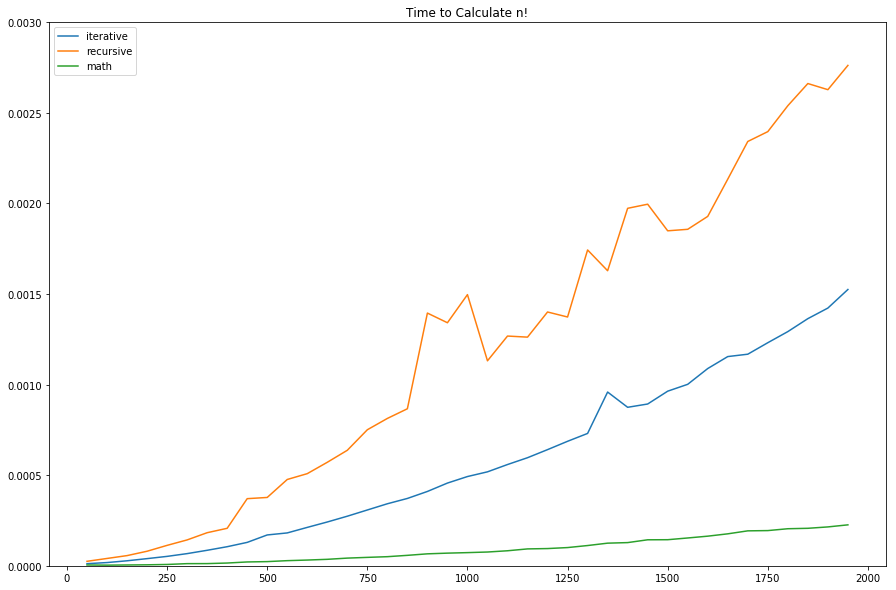

In [30]:
import time
import math
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(2000)
%matplotlib inline

# function for calculating factorials iteratively
def iterative_factorial(n):
    factorial = 1
    for i in range(n, 1, -1):
        factorial *= n
        n -= 1
    return factorial

# function for calculating factorials recursively
def recursive_factorial(n):
    if n<= 1:
        return 1
    return n * recursive_factorial(n-1)

# function for capturing the elapsed time to calculate n! using one of three specified algorithm
# output is a dict with algorithm types as keys and times as values
def factorial_compare(n, algorithm_type):
    start_time = time.time()
    if algorithm_type == 'iterative':
        iterative_factorial(n)
    elif algorithm_type == 'recursive':
        recursive_factorial(n)
    else:
        math.factorial(n)
    time_dict[algorithm_type].append(time.time() - start_time)
    
# collect the calculation times for each of the factorial algorithm types as n increases
factorial_types = ['iterative', 'recursive', 'math']    
time_dict = {k: [] for k in factorial_types}    
n_points = list(range(50, 2000, 50))
for n in n_points:
    for factorial_type in factorial_types:
        factorial_compare(n, factorial_type)

# plot calculation time vs n for each factorial algorithm type       
plt.figure(figsize=(15, 10))
for k, v in time_dict.items():
    plt.plot(n_points, v, label=k)     

plt.ylim(ymin=0, ymax=0.003)
plt.legend()
plt.title("Time to Calculate n!")
plt.savefig("factorial_times.png", transparent=False)
plt.show();

Recursion while more compact in code and perhaps more elegant, actually runs about 2x as long as iterative. Some research on google suggests that it is due to repeated function calls and stack usage. Moreover, we can exceed the limits on recursion depth if we go to range(50, 2050, 50). As expected, the native python function has been optimized as part of the .math library

This code repeats the above analysis, but does it for the Fibonacci sequence. This sequence is defined as: $F_n = F_{n-1} + F_{n-2}$, where the sequence is seeded with either: $F_0=0,\ F_1=1\ \ or\ \   F_1=1,\ F_2=2$.

Do you want to start the series with 0 or 1? 0
iter 3 1
recur 3 1
iter 8 13
recur 8 13
iter 13 144
recur 13 144
iter 18 1597
recur 18 1597
iter 23 17711
recur 23 17711
iter 28 196418
recur 28 196418
iter 33 2178309
recur 33 2178309
iter 38 24157817
recur 38 24157817


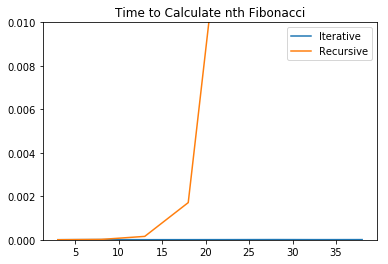

In [2]:
import time
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# comparision of the time required for each alternative to run

# iterative implementation, takes number of terms and option to start with 0, 1 or 1, 1
# original defintion historicallly starts with 1, 1, but more modern usage starts with 0, 1, default is 0, 1
# 0 uses 0, 1; 1 uses 1, 1
def iterative_fibonacci(n):   

    if start == 0:                     # if requesting modern fibonacci (0,1,1,2,3,5...)
        last = 1                       # most recently calculated term, here it is F1
        pen = 0                        # prior term (penultimate), here F0
        for i in range(start+3,n+1):
            next = last + pen
            pen = last
            last = next
        return next

    elif start == 1:                   # if requesting modern fibonacci (0,1,1,2,3,5...)
        last = 1                       # most recently calculated term, here it is F2
        pen = 1                        # prior term (penultimate), here F1
        for i in range(start+2,n+1):
            next = last + pen
            pen = last
            last = next
        return next

def recursive_fibonacci(n):
    f_n = 0

    if start == 0:                     # if requesting modern fibonacci (0,1,1,2,3,5...)
        if n <=3:
            f_n = f_n + 1 + 0
            return f_n 
        f_n = recursive_fibonacci(n-1) + recursive_fibonacci(n-2)
        return f_n
    
    elif start == 1:                   # if requesting modern fibonacci (0,1,1,2,3,5...)
        if n <=2:
            f_n = f_n + 1 + 0
            return f_n 
        f_n = recursive_fibonacci(n-1) + recursive_fibonacci(n-2)
        return f_n       
    
def fibonacci_compare(n):
    n_points.append(n) # build list of n for plot
    
    start_time_i = time.time() # start timestamp
    next = iterative_fibonacci(n)   # iterative case
    delta_t = time.time() - start_time_i  # elapsed time
    print('iter', n, next)
    inter.append(delta_t)  # build list of results for plot
    
    start_time_r = time.time()
    f_n = recursive_fibonacci(n)  # recursive case
    delta_t = time.time() - start_time_r
    print('recur', n, f_n)
    recur.append(delta_t)  # build list of results for plot
    
start = -1
while (start + 1 != 1) and (start + 1 != 2):
    start = int(input("Do you want to start the series with 0 or 1? "))

# empty lists to collect data for plotting
n_points = []
inter = []
recur = []

for n in range(3, 43, 5):
    fibonacci_compare(n)

plt.plot(n_points, inter, label="Iterative")
plt.plot(n_points, recur, label="Recursive") 
plt.ylim(ymin=0, ymax=0.01)
plt.legend()
plt.title("Time to Calculate nth Fibonacci")
plt.show();    